# Interaction between distance and softmax
In this notebook I explore how the softmax function transforms the distance between two points. In order to do so I show the following:
* First how the distance after softmax from 0 to a point x evolves as x move further away from zero starting from 0. This I do both for positive and negative values of x. 
* We show how the distance after softmax evolves between two points that are separated by a distance of 1 (x, and x + 1) as x varies for both positive and negative values.

#### Load the libraries

In [1]:
from __future__ import print_function
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from connectivity_functions import softmax
import seaborn as sns
sns.set(font_scale=2.0)

%matplotlib inline
np.set_printoptions(suppress=True)

/home/heberto/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## First 0 to x 

In [2]:
x = 0
points = np.logspace(-1.5, 1.5, num=5000)
negative_points = -points
points = np.concatenate((negative_points, points))

distance = np.zeros_like(points)

for index, y in enumerate(points):
    array = np.array((x, y))
    aux = softmax(array, minicolumns=2)
    distance[index] = np.linalg.norm(aux[0] - aux[1])


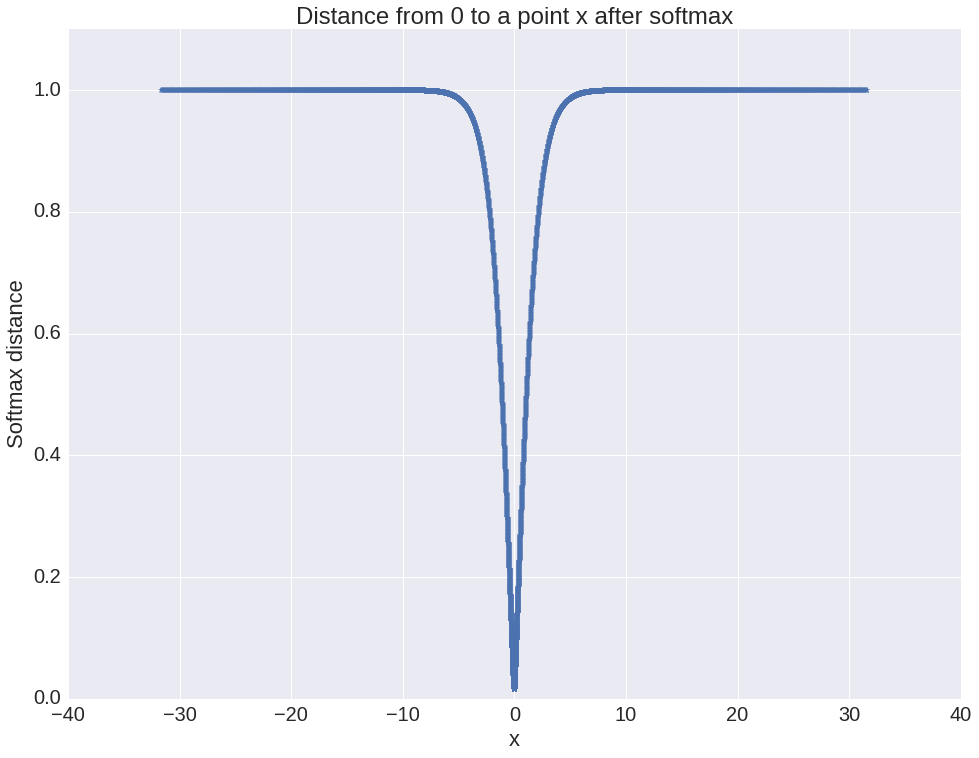

In [3]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Softmax distance')
ax.set_title('Distance from 0 to a point x after softmax')
ax.set_ylim(0, 1.1)
plt.show()


## How softmax affects points that are distance one appart at different parts of the x axis.
That is, how the softmax affects the distance between x and x + 1 for different values of x. In order to study this we will see first how the exponential modified the distance, then normalization and finally softmax

#### Exponential
We first do this for positive numbers

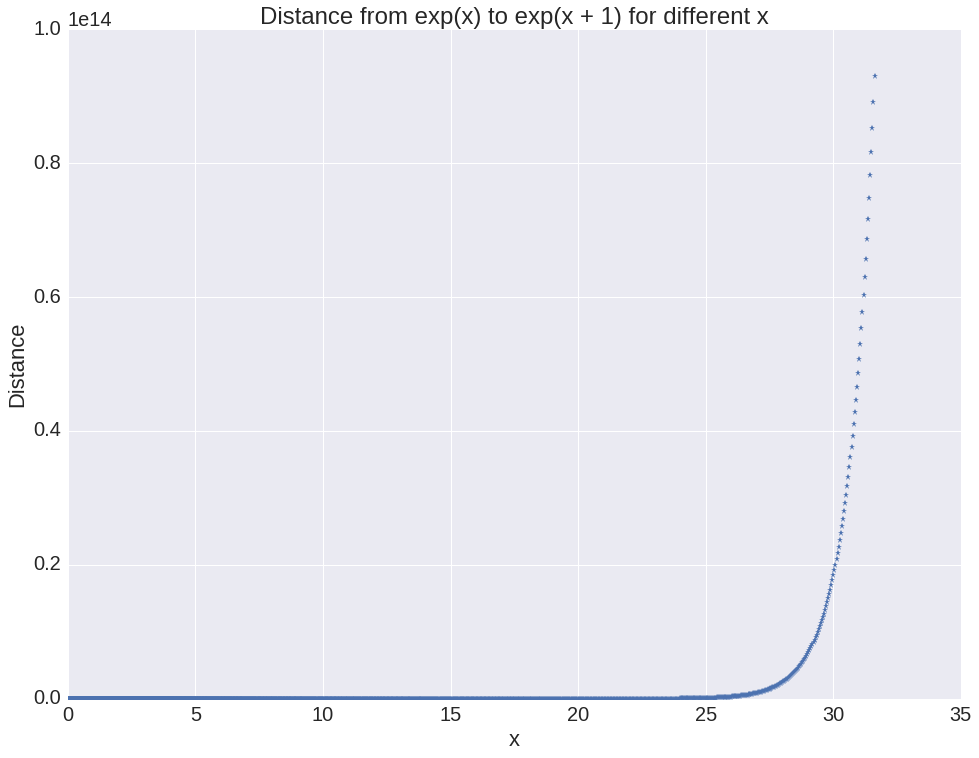

In [4]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = np.exp(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from exp(x) to exp(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()


Now we do the negative side

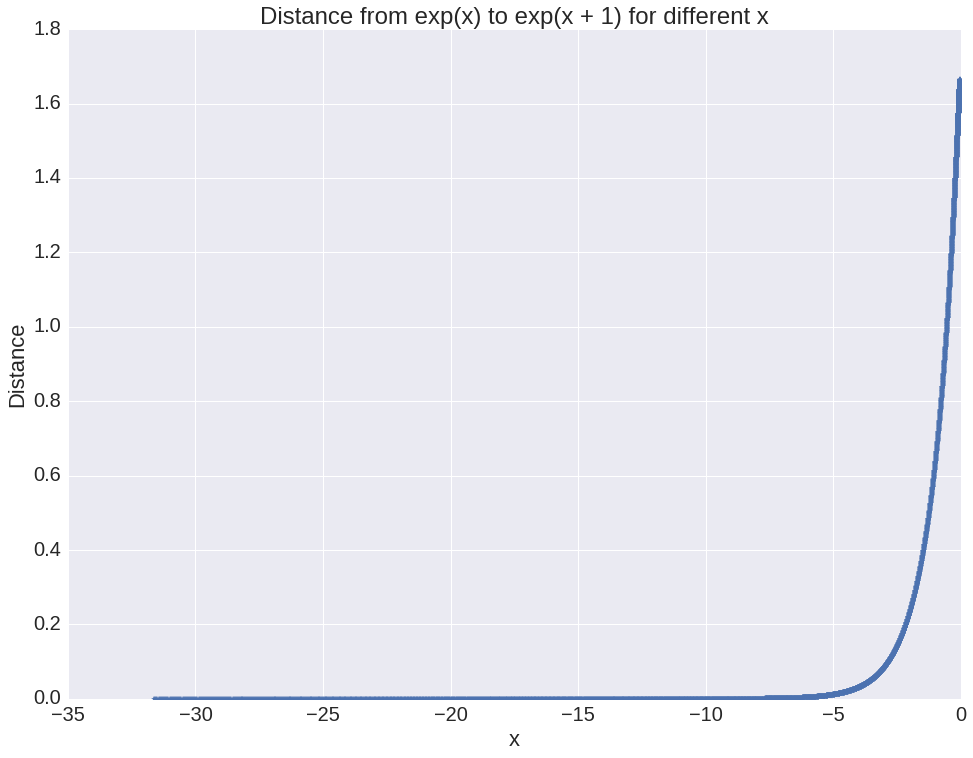

In [5]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)
points = -points

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = np.exp(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from exp(x) to exp(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()


#### Normalization

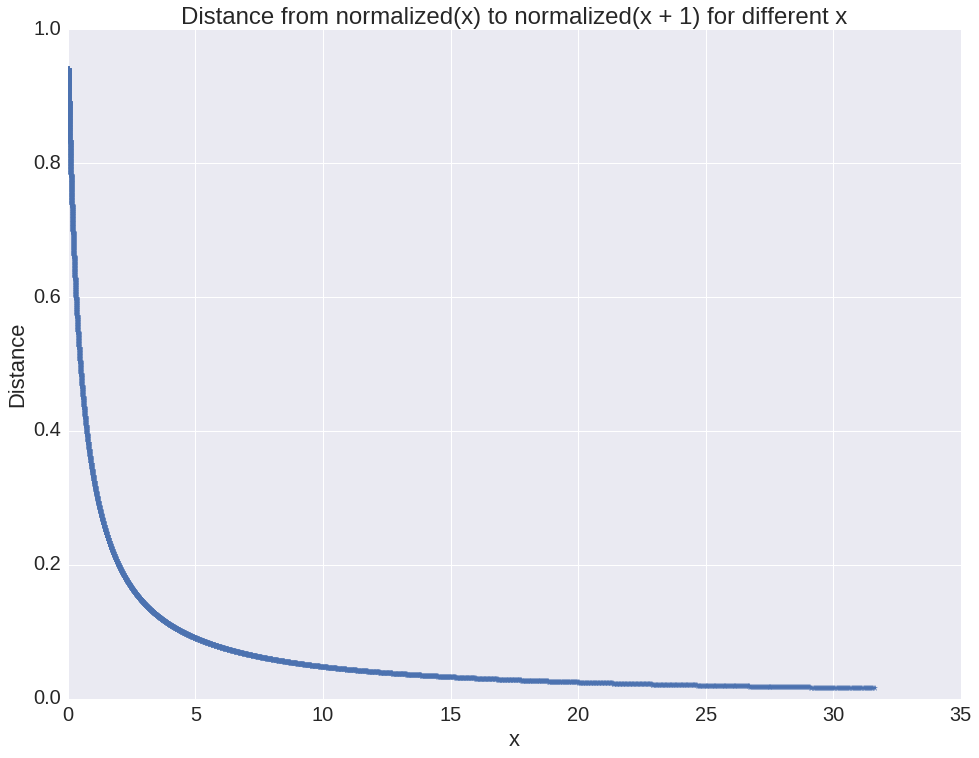

In [6]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = array / np.sum(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from normalized(x) to normalized(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()


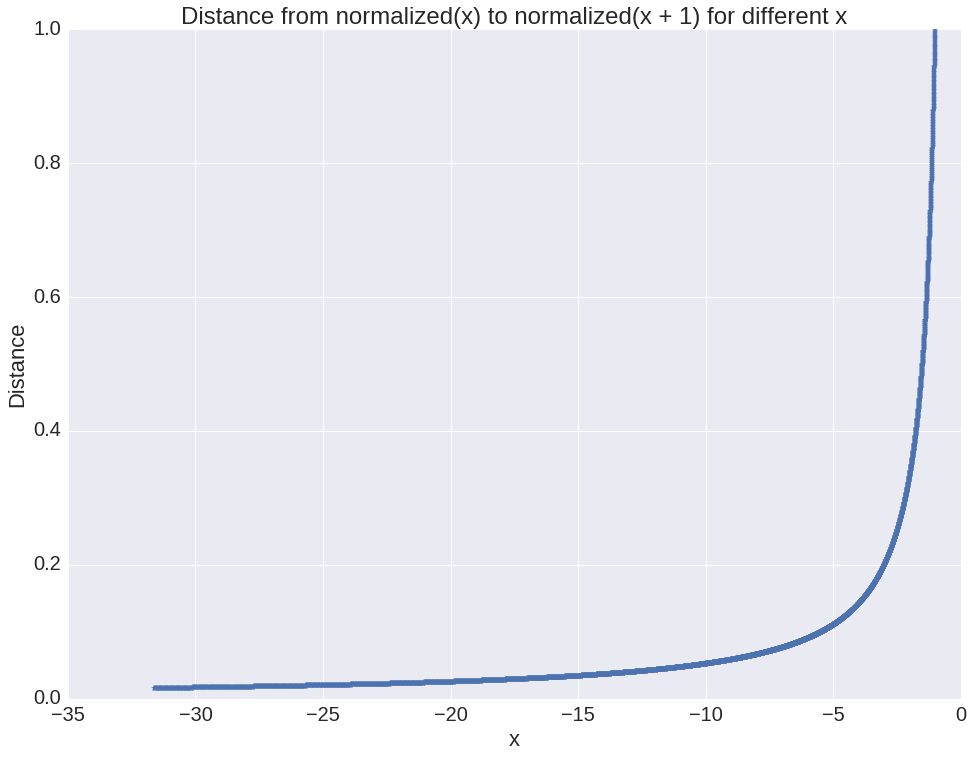

In [7]:
points = np.logspace(0, 1.5, num=5000)
distance = np.zeros_like(points)
points = -points

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = array / np.sum(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    
    
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from normalized(x) to normalized(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()

Note that in this graph will have a discontiniuty at -0.5. Thing that if you normalize 0.5 and -0.5 you get a discontinuity

#### Exponential

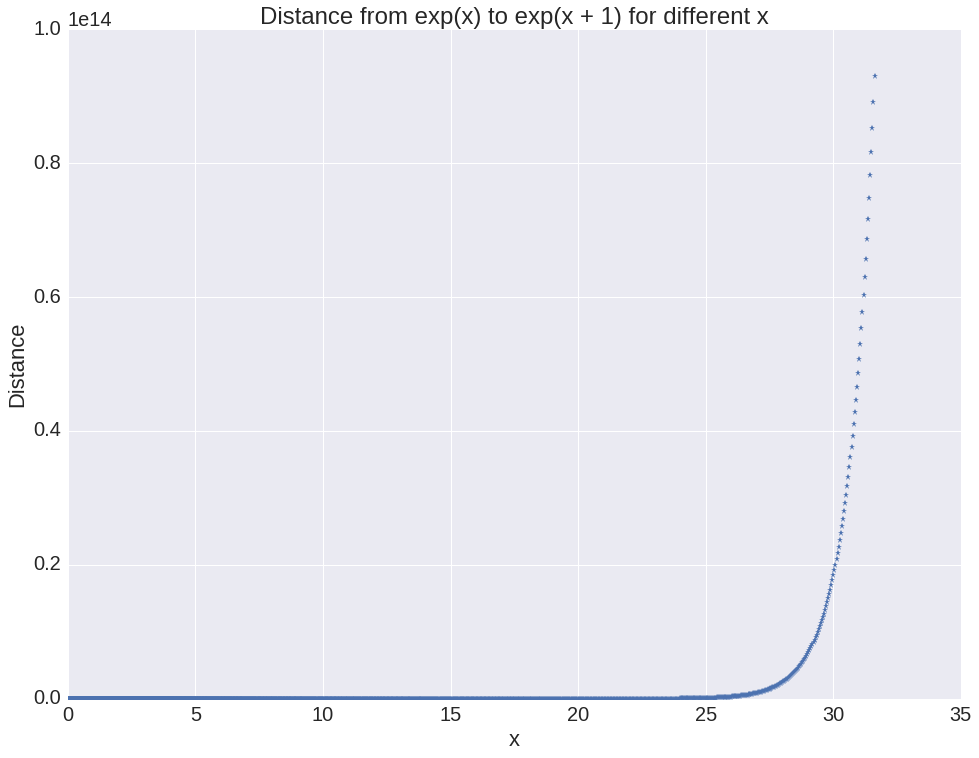

In [8]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = np.exp(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from exp(x) to exp(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()


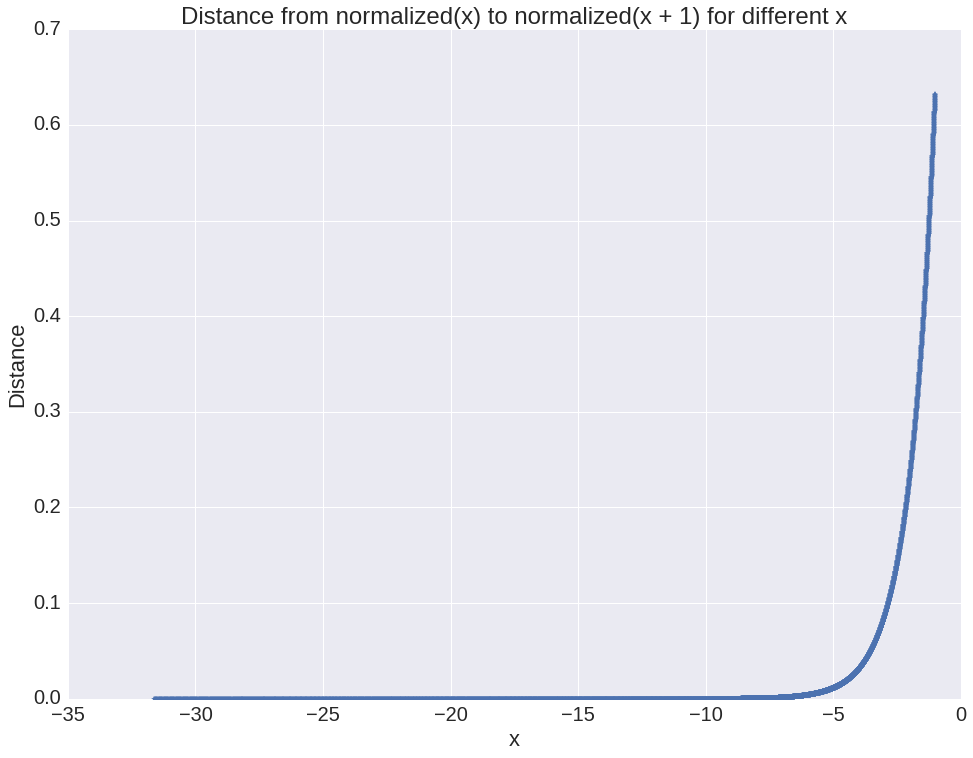

In [9]:
points = np.logspace(0, 1.5, num=5000)
distance = np.zeros_like(points)
points = -points

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = np.exp(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    
    
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from normalized(x) to normalized(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()

#### Softmax

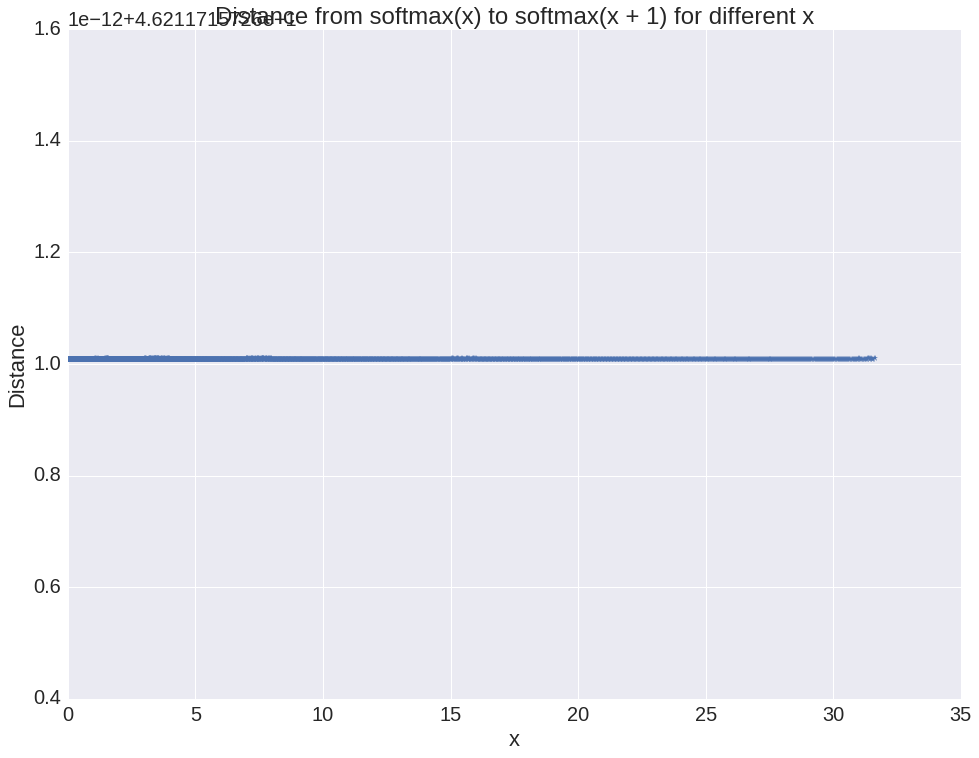

In [10]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = softmax(array, minicolumns=2)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from softmax(x) to softmax(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()

In [11]:
distance

array([ 0.46211716,  0.46211716,  0.46211716, ...,  0.46211716,
        0.46211716,  0.46211716])

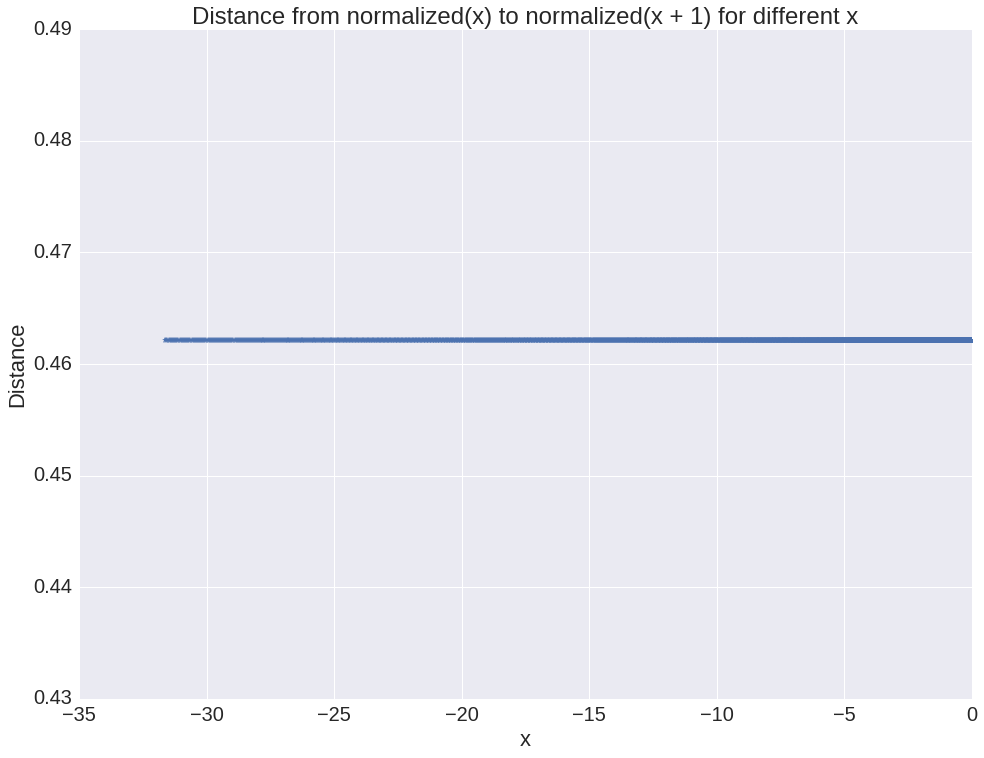

In [12]:
points = np.logspace(-1.5, 1.5, num=5000)
distance = np.zeros_like(points)
points = -points

for index, y in enumerate(points):
    x = y + 1
    array = np.array((x, y))
    aux = softmax(array)
    distance[index] = np.linalg.norm(aux[0] - aux[1])
    
    
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(points, distance, '*', linewidth=10)

ax.set_xlabel('x')
ax.set_ylabel('Distance')
ax.set_title('Distance from normalized(x) to normalized(x + 1) for different x')
# ax.set_ylim(0, 1.1)
plt.show()

#### Scaling depending in distance
So instead of adding one and calculating the distance after softmax we calcualted the algebraic experience for adding d and calculating the distance after. The result is $$\frac{|(1 - e^d)|}{(1 + e^d)}$$

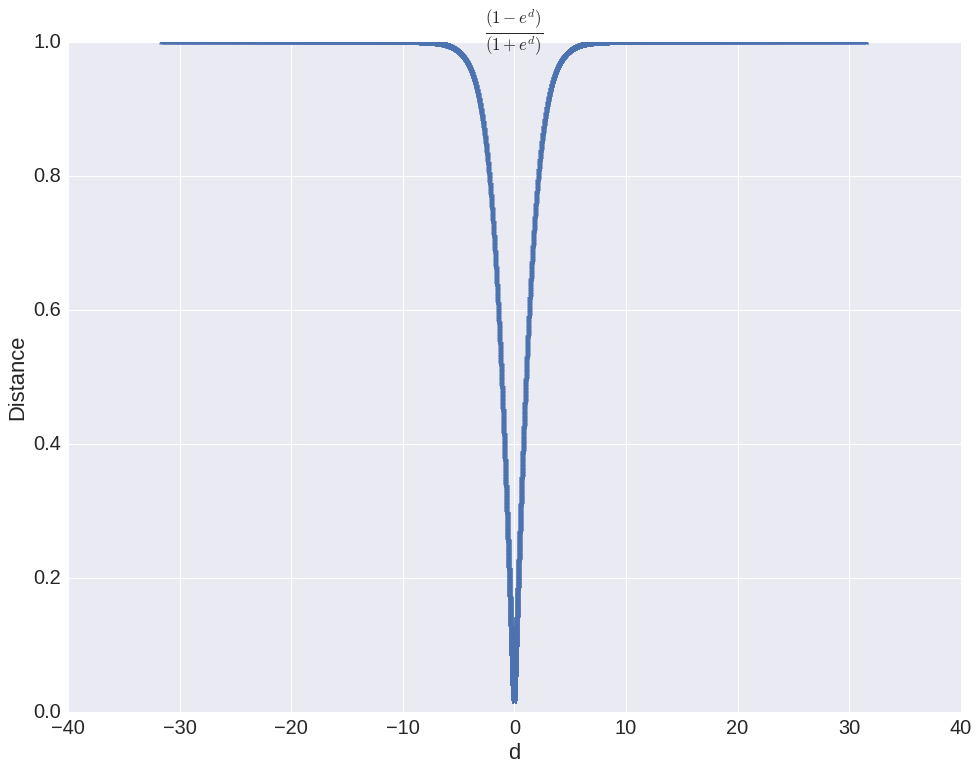

In [13]:
points = np.logspace(-1.5, 1.5, num=5000)
negative_points = -points
d = np.concatenate((negative_points[::-1], points))


e = np.exp(d)
ratio = np.abs((1 - e)) / ((1 + e))

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(d, ratio, '*', linewidth=10)

ax.set_xlabel('d')
ax.set_ylabel('Distance')
ax.set_title(r'$\frac{(1 - e^d)}{(1 + e^d)}$')
# ax.set_ylim(0, 1.1)
plt.show()

This is the same graph than the first graph above. What is happenig is basically that the exponential throws even values that a smaller distance between them very far away from each other (actually exponentially far away) and then **normalization just works like winner takes all for most cases here**